# Mini projects

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

In [2]:
window_name = "filter"
cap = cv2.VideoCapture(0)
key = 0 
cv2.namedWindow(window_name,cv2.WINDOW_AUTOSIZE)
while (True):
    ret, frame = cap.read()
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_frame, (5, 5), 0)
    edges = cv2.Canny(blurred, 30, 150)
    
    cv2.imshow(window_name,edges)

    if key == 27:
        break
    
    key = cv2.waitKey(1)



cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)




-1

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

In [35]:


def black_image(image_path):
    img = cv2.imread(image_path)
    image=img.copy()
    im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    thresh, _ = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    image = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]

    cv2.imshow("",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

black_image("img/noisy.png")


## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

In [60]:

window_name = "filter"
cap = cv2.VideoCapture(0)
key = 0 
cv2.namedWindow(window_name,cv2.WINDOW_AUTOSIZE)
while (True):
    ret, frame = cap.read()
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    thresh, _ = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    frame = cv2.threshold(gray_frame, thresh, 255, cv2.THRESH_BINARY)[1]
    

    
    cv2.imshow(window_name,frame)

    if key == 27:
        break
    
    key = cv2.waitKey(1)



cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)



-1

### Photo correction app

1. Create a funtion to clean *noise* from images


![Noisy image](img/n.png)

In [61]:

def clean_noise(image_path):

    img = cv2.imread(image_path)
    image=img.copy()

    cleaned_image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)

    cv2.imshow("",cleaned_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
clean_noise('img/noisy.png')

In [58]:
kernel = np.array([[0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]])

img = cv2.imread("img/noisy.png")
image=img.copy()


R,G,B = image.shape

tb = 0.272*R + 0.534*G + 0.131*B
tg = 0.349/R + 0.686*G + 0.168/B
tr = 0.393/R + 0.769*G + 0.189*B


if tb > 255: b = 255 
else: b = tb
if tg > 255: g = 255 
else: g = tg
if tr > 255:r = 255 
else: r = tr




### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [2]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [3]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

100.0%
Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

102.8%
Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

100.0%
Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

112.7%Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!

/home/umut/.virtualenvs/my-project-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).v

In [4]:
class Network(nn.Module):
    
    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(16, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.fc1.weight.grad)
optimizer.step()

Initial weights -  Parameter containing:
tensor([[-0.0142, -0.0011, -0.0308,  ..., -0.0062,  0.0183,  0.0137],
        [-0.0310, -0.0196,  0.0083,  ..., -0.0074, -0.0241,  0.0005],
        [ 0.0023, -0.0173,  0.0014,  ...,  0.0282,  0.0158,  0.0050],
        ...,
        [-0.0026, -0.0095, -0.0214,  ..., -0.0275, -0.0119,  0.0174],
        [ 0.0203,  0.0205, -0.0184,  ...,  0.0234, -0.0305,  0.0030],
        [ 0.0148, -0.0174,  0.0269,  ..., -0.0224, -0.0233, -0.0265]],
       requires_grad=True)
Gradient - tensor([[ 4.5377e-04,  4.5377e-04,  4.5377e-04,  ...,  4.5377e-04,
          4.5377e-04,  4.5377e-04],
        [-3.3836e-04, -3.3836e-04, -3.3836e-04,  ..., -3.3836e-04,
         -3.3836e-04, -3.3836e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-1.2378e-05, -1.2378e-05, -1.2378e-05,  ..., -1.2378e-05,
         -1.2378e-05, -1.2378e-05],
        [-9.3446e-05, -9.3446e-05, -9.3446e-05,  ..., -9.3446e

In [26]:
epochs = 60
print_every = 1860

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

Epoch: 1/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4851
	Iteration: 3720	 Loss: 1.4873
Epoch: 2/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4862
	Iteration: 3720	 Loss: 1.4855
Epoch: 3/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4842
	Iteration: 3720	 Loss: 1.4870
Epoch: 4/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4851
	Iteration: 3720	 Loss: 1.4855
Epoch: 5/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4862
	Iteration: 3720	 Loss: 1.4841
Epoch: 6/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4848
	Iteration: 3720	 Loss: 1.4857
Epoch: 7/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4848
	Iteration: 3720	 Loss: 1.4849
Epoch: 8/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4840
	Iteration: 3720	 Loss: 1.4855
Epoch: 9/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4838
	Iteration: 3720	 Loss: 1.4850
Epoch: 10/60
	Iteration: 0	 Loss: 0.0008
	Iteration: 1860	 Loss: 1.4839
	Iteration

In [43]:
correct, total = 0,0
predictions = []
model.eval()

for i,data in enumerate(testloader,0):
    inputs, labels = data
    inputs.resize_(inputs.size()[0], 784)
    print(inputs.shape)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data,1)
    predictions.append(outputs)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print("testing set accuracy: %d %%" % (100*correct/total))

torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size([16, 784])
torch.Size

In [47]:
three = cv2.imread("img/3.jpg")

#three = cv2.resize(three, (28, 28))
three = np.reshape(three,(784,16))
three = torch.from_numpy(three)
print(three.shape)
model(three)

ValueError: cannot reshape array of size 339300 into shape (784,16)

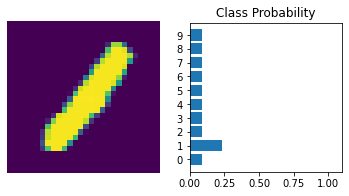

In [32]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)